In [48]:
%load_ext autoreload
%autoreload 2
%matplotlib inline

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [49]:
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt

In [50]:
session = tf.InteractiveSession()
optimizer = tf.train.RMSPropOptimizer(learning_rate=0.0001)

In [51]:
def cumsum(xs):
    values = tf.unpack(xs)
    out = []
    prev = tf.zeros_like(values[0])
    for val in values:
        s = prev + val
        out.append(s)
        prev = s
    result = tf.pack(out)
    return result

In [52]:
m = 10.0
F = tf.Variable(tf.random_uniform([200,1],minval=-0.001, maxval=0.001))
xdd = tf.div(F,m)
xd = cumsum(xdd)
x = cumsum(xd)

In [53]:
penalty = tf.reduce_sum(tf.abs(10.0-x))

In [54]:
train_op = optimizer.minimize(penalty,var_list=[F])
session.run(tf.initialize_all_variables())

In [55]:
for i in range(0,10000):
    _,error = session.run([train_op,penalty], {})
    if (i % 100) == 0:
        print error

2006.64
1079.36
814.4
649.396
582.156
564.672
549.009
539.227
527.906
519.896
514.588
507.698
502.143
496.674
490.28
485.781
481.691
477.19
473.519
470.802
465.603
463.82
460.541
456.443
454.178
450.009
447.163
446.443
443.681
441.209
437.402
436.722
434.757
432.322
429.54
428.427
424.744
424.24
422.396
419.994
418.844
415.586
415.9
413.891
412.242
410.359
408.492
406.742
404.788
403.926
403.8
401.01
401.591
399.195
397.725
395.815
395.661
394.481
393.096
392.347
392.151
390.177
389.022
387.666
387.112
384.903
384.501
383.056
382.311
381.682
381.237
380.025
379.181
378.46
377.409
376.184
375.607
373.999
372.943
372.609
371.434
371.592
371.003
369.3
369.189
368.567
366.621
366.265
365.987
364.926
364.273
363.567
363.219
361.989
361.469
361.081
360.836
360.311
359.138
358.357


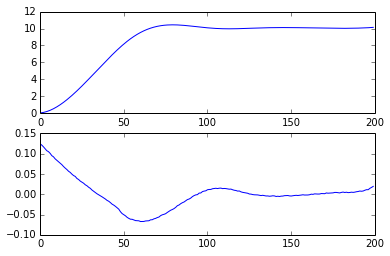

In [57]:
x_opt, F_opt = session.run([x,F], {})
ax1 = plt.subplot(2, 1, 1)
ax1.plot(x_opt)
ax2 = plt.subplot(2, 1, 2)
ax2.plot(F_opt)